# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet

# %matplotlib inline
%matplotlib notebook

In [111]:
# 1. Identificação do encoding
with open(r'C:\Users\earap\Documents\EBAC\ciencia_dados\006\dados.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
encoding = result['encoding']
print(f'O encoding do arquivo é: {encoding}')

O encoding do arquivo é: utf-8


In [112]:
# 2. Leitura do arquivo CSV usando pandas
df = pd.read_csv(r'C:\Users\earap\Documents\EBAC\ciencia_dados\006\dados.csv', encoding=encoding)

In [113]:
# 3. Identificação do separador e do delimitador de células
with open(r'C:\Users\earap\Documents\EBAC\ciencia_dados\006\dados.csv', 'r', encoding=encoding) as f:
    first_line = f.readline().strip()  # Lê a primeira linha e remove espaços em branco
    
    # Verifica o separador mais comum
    if ',' in first_line:
        separator = ','
    elif ';' in first_line:
        separator = ';'
    else:
        separator = None
    
    # Verifica o delimitador de células
    if '"' in first_line:
        delimiter = '"'
    else:
        delimiter = None

print(f'O separador do arquivo é: {separator}')
print(f'O delimitador de células do arquivo é: {delimiter}')

O separador do arquivo é: ,
O delimitador de células do arquivo é: "


In [114]:
# Printando as variáveis e nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [115]:
# Plotando os valores únicos
df['SEXO'].head(5).unique()

array(['Masculino', 'Feminino'], dtype=object)

In [116]:
# Plotando os valores únicos
df['GESTACAO'].unique()

array(['37 a 41 semanas', '42 semanas e mais', '32 a 36 semanas',
       '22 a 27 semanas', '28 a 31 semanas', nan, 'Menos de 22 semanas'],
      dtype=object)

In [117]:
# Plotando os valores únicos
df['ESTCIVMAE'].unique()

array([ 5.,  2.,  9.,  1.,  4., nan,  3.])

In [118]:
# Plotando os valores únicos
df['APGAR5'].unique()

array([10.,  9.,  7.,  0.,  8.,  4.,  3.,  6.,  5., nan,  2.,  1.])

In [119]:
# Plotando os valores únicos
df['APGAR1'].unique()

array([ 9.,  8.,  5.,  2.,  7.,  6., 10.,  4.,  1.,  3.,  0., nan])

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

<IPython.core.display.Javascript object>


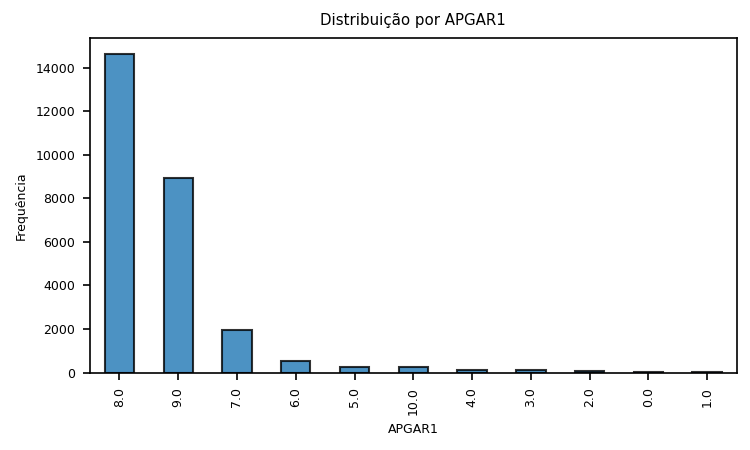

In [135]:
# Gráfico de barras para APGAR1
plt.figure(figsize=(5, 3))
df['APGAR1'].value_counts().plot(kind='bar', edgecolor='black', alpha=0.8)
plt.title('Distribuição por APGAR1')
plt.xlabel('APGAR1')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [136]:
# Fechando o gráfico
plt.close('all')

<IPython.core.display.Javascript object>


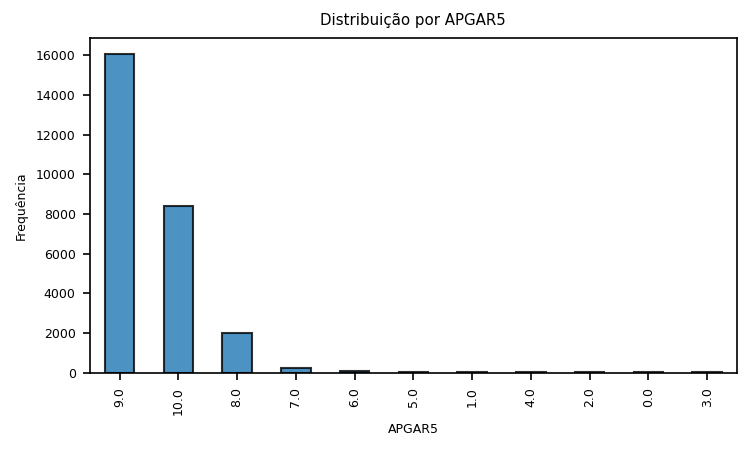

In [137]:
# Gráfico de barras para APGAR5
plt.figure(figsize=(5, 3))
df['APGAR5'].value_counts().plot(kind='bar', edgecolor='black', alpha=0.8)
plt.title('Distribuição por APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [138]:
# Fechando o gráfico
plt.close('all')

<IPython.core.display.Javascript object>


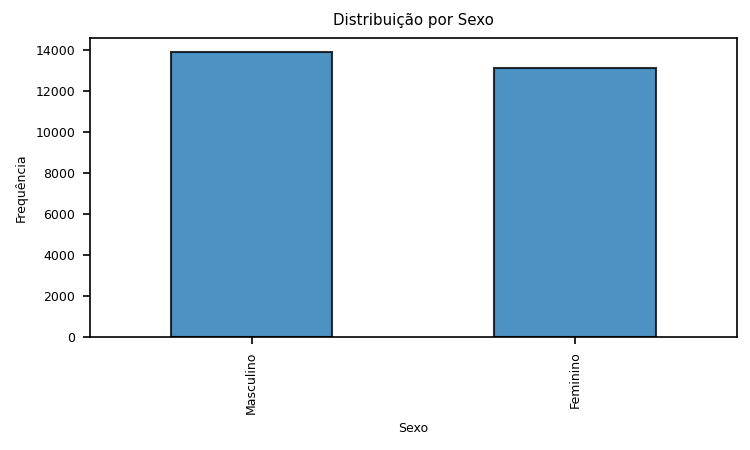

In [139]:
# Gráfico de barras para SEXO
plt.figure(figsize=(5, 3))
df['SEXO'].value_counts().plot(kind='bar', edgecolor='black', alpha=0.8)
plt.title('Distribuição por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [140]:
# Fechando o gráfico
plt.close('all')

<IPython.core.display.Javascript object>


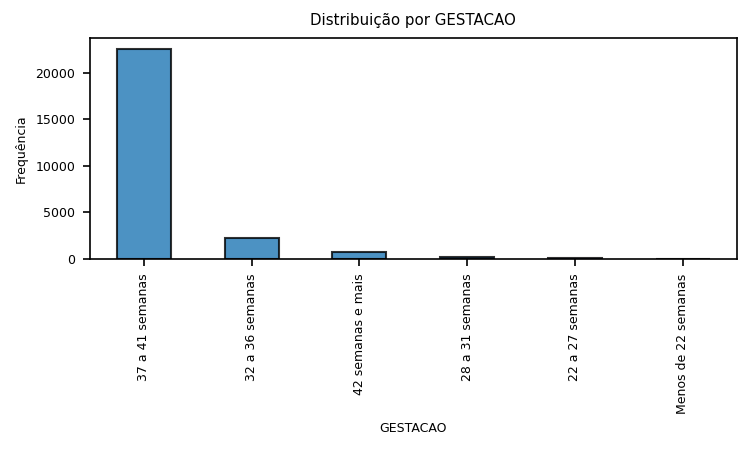

In [141]:
# Gráfico de barras para GESTACAO
plt.figure(figsize=(5, 3))
df['GESTACAO'].value_counts().plot(kind='bar', edgecolor='black', alpha=0.8)
plt.title('Distribuição por GESTACAO')
plt.xlabel('GESTACAO')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [142]:
# Fechando o gráfico
plt.close('all')

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [143]:
# Calculando total consultas
total = df['APGAR5'].count()
total

26925

In [144]:
df['CONSULTAS'].unique()

array([4, 3, 2, 1, 9], dtype=int64)

In [145]:
# Calcular a média de 'APGAR5' por 'CONSULTA'
media_apgar5_por_consulta = df.groupby('CONSULTAS')['APGAR5'].mean()
media_apgar5_por_consulta

CONSULTAS
1    8.981481
2    9.057395
3    9.154440
4    9.207188
9    8.860000
Name: APGAR5, dtype: float64

<IPython.core.display.Javascript object>


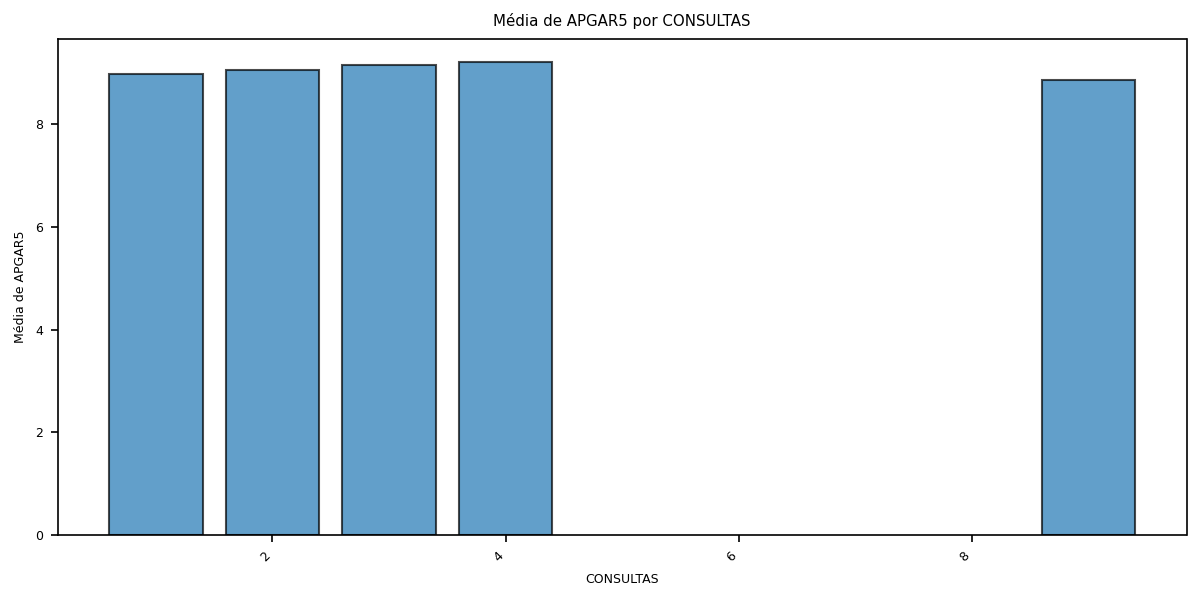

In [146]:
# Configurar o gráfico
plt.figure(figsize=(8, 4))
plt.bar(media_apgar5_por_consulta.index, media_apgar5_por_consulta.values, edgecolor='black', alpha=0.7)
plt.title('Média de APGAR5 por CONSULTAS')
plt.xlabel('CONSULTAS')
plt.ylabel('Média de APGAR5')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

In [147]:
plt.close('all')

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<IPython.core.display.Javascript object>


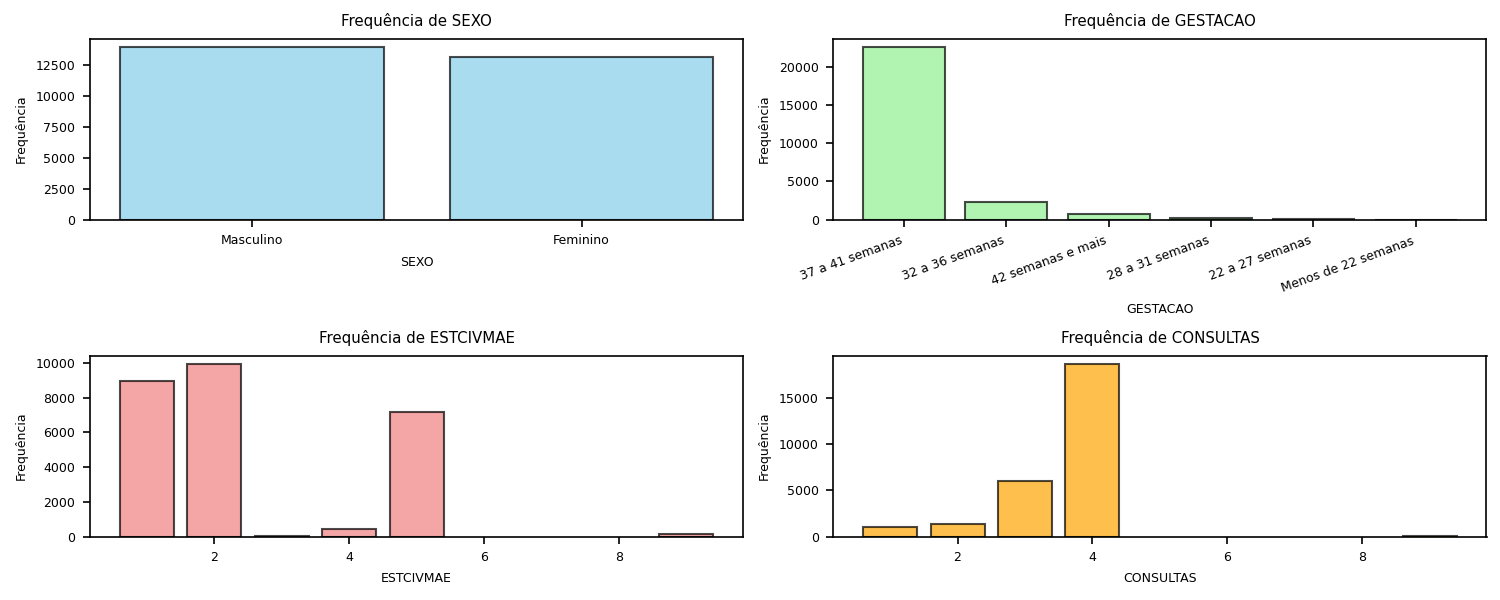

In [148]:
# Configurar o layout do painel com 4 gráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 4))

# Gráfico de frequência de SEXO
axs[0, 0].bar(df['SEXO'].value_counts().index, df['SEXO'].value_counts().values, color='skyblue', edgecolor='black', alpha=0.7)
axs[0, 0].set_title('Frequência de SEXO')
axs[0, 0].set_xlabel('SEXO')
axs[0, 0].set_ylabel('Frequência')

# Gráfico de frequência de GESTACAO
gestacao_counts = df['GESTACAO'].value_counts()
axs[0, 1].bar(gestacao_counts.index, gestacao_counts.values, color='lightgreen', edgecolor='black', alpha=0.7)
axs[0, 1].set_title('Frequência de GESTACAO')
axs[0, 1].set_xlabel('GESTACAO')
axs[0, 1].set_ylabel('Frequência')
axs[0, 1].set_xticks(gestacao_counts.index)
axs[0, 1].set_xticklabels(gestacao_counts.index, rotation=20, ha='right')

# Gráfico de frequência de ESTCIVMAE
axs[1, 0].bar(df['ESTCIVMAE'].value_counts().index, df['ESTCIVMAE'].value_counts().values, color='lightcoral', edgecolor='black', alpha=0.7)
axs[1, 0].set_title('Frequência de ESTCIVMAE')
axs[1, 0].set_xlabel('ESTCIVMAE')
axs[1, 0].set_ylabel('Frequência')

# Gráfico de frequência de CONSULTAS
axs[1, 1].bar(df['CONSULTAS'].value_counts().index, df['CONSULTAS'].value_counts().values, color='orange', edgecolor='black', alpha=0.7)
axs[1, 1].set_title('Frequência de CONSULTAS')
axs[1, 1].set_xlabel('CONSULTAS')
axs[1, 1].set_ylabel('Frequência')

# Ajustar layout para melhor visualização
plt.tight_layout()
plt.show()

In [149]:
plt.close('all')